## Random walks and diffusion

In the next set of lectures, we will explore how molecules and assemblies move around by thermal motion. Such random walks are the primary way molecules move around at short dirandomstances and you will encounter diffusion over and over again during this lecture and in other parts of biology. 
Such motion was descibed by a botanist [Robert Brown](https://en.wikipedia.org/wiki/Brownian_motion) observing pollen under a microscope and is also known as "Brownian motion".

![brownian_motion](https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif)

The following picture, for example, illustrates a "Fluorescence Recovery after Photobleaching" experiment that is used to measure how molecules move around and equilibrate in the cell:

![image.png](figures/FRAP.png)
source: BioQuant Heidelberg

In this experiment, a laser is used to destroy fluorophore in a small volume and we observe how the initially dark spot starts to be green again since the intact fluorophore is diffusing into the volume what was bleached. From the speed at which fluorescence recovers, we can measure diffusion constants and intra-cellular transport properties.

At the end of this set of lectures, you should be in a position to interpret and analyze such an experiment and understand the basic properties of diffusion.

### Random walks

Before we venture into diffusion in continuous space, lets consider random walks on a lattice:

![image.png](figures/RW_1d_sketch.png)

 * flip a coin: step left or right depending on head or tail
 * repeat $n$ times
 
How often are you going to end up in what place?

This is similar to observing balls fall in a _Galton board_. Here is an excellent visualization from the [3Blue1Brown youtube channel](https://www.youtube.com/watch?v=zeJD6dqJ5lo)

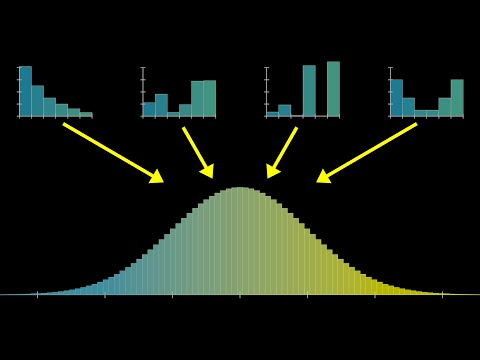

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta

YouTubeVideo(
    'zeJD6dqJ5lo',
    width=1000, height=600,
    start=int(timedelta(minutes=1, seconds=54).total_seconds()),
    end=int(timedelta(minutes=3, seconds=50).total_seconds()),
    cc_load_policy=0,
)

We can solve this either analytically, or by trial and error with the computer. Let's try the latter first:

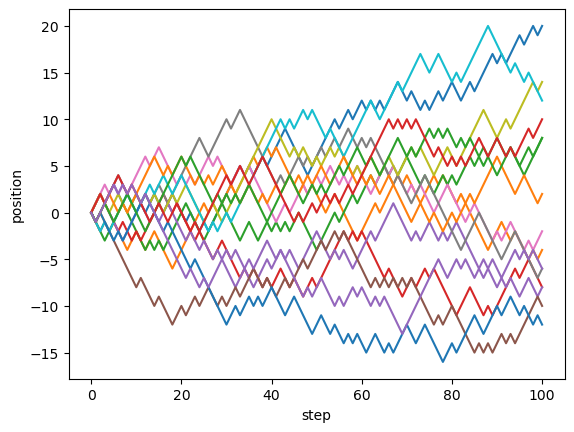

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n_repetitions = 15
n_steps = 100
p=0.5


# we repeat the entire process several timesx
for rep in range(n_repetitions):
    # record a trajectory of n_steps steps, starting at 0
    traj = [0]
    for step in range(n_steps):
        # at this step, we ask the computer to flip a coin: np.random.random()<0.5
        if np.random.random()<p:
            traj.append(traj[step] + 1)
        else:
            traj.append(traj[step] - 1)
    plt.plot(traj)

plt.xlabel('step')
plt.ylabel('position')
plt.show()

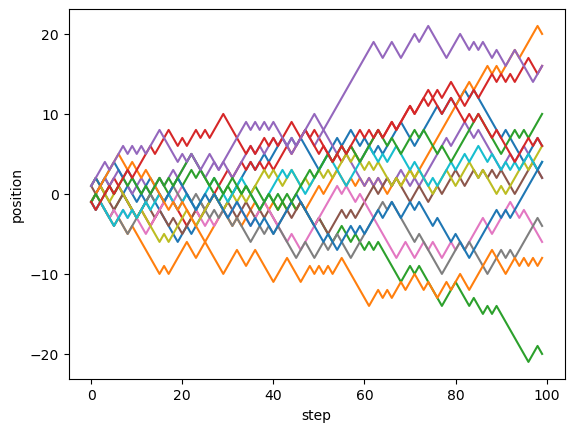

In [3]:
# ALTERNATIVE IMPLEMENTATION
n_repetitions = 15
n_steps = 100
p=0.5

for rep in range(n_repetitions):
    # cumsum sums all elements in an array, 
    # 2*(np.random.random(size=n_steps)<p) - 1 is a list of +/- 1 of length n_steps
    left_right_steps = 2*(np.random.random(size=n_steps)<p) - 1
    # sum these steps to calculate the position along the trajectory
    traj = np.cumsum(left_right_steps)
    # plot
    plt.plot(traj)

plt.xlabel('step')
plt.ylabel('position')
plt.show()

### Binomial distribution
We already mentioned that this type of one-dimensional random walk is essentially just coin tossing. If after $n$ steps you have moved $k$ times to the right and $n-k$ times to the left your position is

$$
x = k - (n-k) = 2k - n
$$

So to understand the distribution  $p(x | n)$ of where we end up after $n$ steps, we only need to understand how often we observe $k$ heads out of $n$ coin tosses. 

The probability to observe a particular series of outcomes like $+-+---++-$ is simply $p^k (1-p)^{n-k}$, where $k$ is the number of heads. But there is exactly one outcome with $k=0$, but $n$ outcomes with $k=1$, etc. The total number of possibilities to achieve $k$ heads in $n$ trials is given by the binomial factor. Together, we find 

$$
P(k|n) = p^k(1-p)^{n-k} \frac{n!}{k!(n-k)!}
$$

This binomial distribution is hopefully familiar to you already. If not, take a minute to refresh you knowledge, for example by watching this [video](https://www.youtube.com/watch?v=8fqkQRjcR1M).

The only difference between the coin tossing and the random walk is the transformation from the number of heads to the position

$$
x = 2k - n
$$

The average position (often denoted as Expectation Value $E(x)$) is 

$$
\langle x\rangle = 2 \langle k \rangle - n
$$

Since the average number of heads $\langle k \rangle = np$ we have $\langle x\rangle = n(2p-1)$. 

The variance of the position $Var(x)$ is the average squared deviation from the mean $\langle (x - \langle x \rangle)^2 \rangle$. 
In our case, it is given by 

$$
\langle (x - \langle x \rangle)^2 \rangle = \langle (2 (k-np))^2 \rangle = 4\langle (k-np)^2 \rangle = 4np(1-p)
$$

The most important features here are:
 
  * the average position is linear in the number of steps with a speed $2p-1$
  * the variance of the position is linear in the number of steps
  * a linear variance implies that the standard deviation grows $\sim\sqrt{n}$

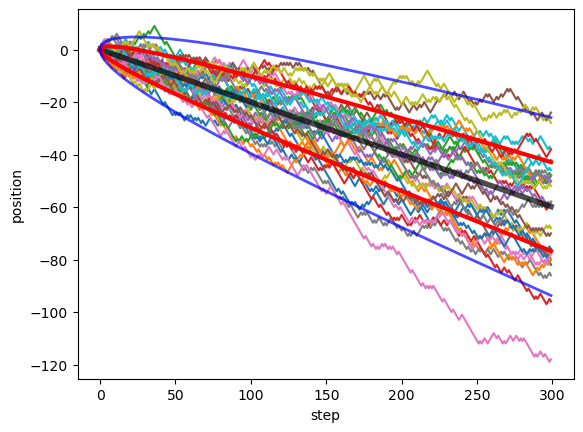

In [4]:
# the following plot will illustrate the behavior of the 
# random walks in a statistical sense.
# We will create many random walks and look at the mean 
# and variance of the position after different numbers of steps
n_repetitions = 30
n_steps = 300
p=0.4

for rep in range(n_repetitions):
    # cumsum sums all elements in an array, 2*(np.random.random(size=n_steps)<p) - 1 is a list of +/- 1 of length n_steps
    left_right_steps = 2*(np.random.random(size=n_steps)<p) - 1
    # sum these steps to calculate the position along the trajectory
    traj = np.cumsum(left_right_steps)
    # plot
    plt.plot(traj)

steps = np.arange(n_steps)
# plot the average
mean = (2*p-1)*steps
plt.plot(steps, mean, lw=4, alpha=0.7, c='k')

# plot the average +/- one standard deviation
one_std = np.sqrt(4*p*(1-p)*steps)
plt.plot(steps, mean + one_std, lw=3, alpha=1.0, c='r')
plt.plot(steps, mean - one_std, lw=3, alpha=1.0, c='r')
# plot the average +/- two standard deviations
plt.plot(steps, mean + 2*one_std, lw=2, alpha=0.7, c='b')
plt.plot(steps, mean - 2*one_std, lw=2, alpha=0.7, c='b')
plt.xlabel('step')
plt.ylabel('position')
plt.show()

In [5]:
# Alternatively, we can plot the distributions. 
# Let make a long list of very many trajectories!
n_repetitions = 1000
n_steps = 201
p=0.6

all_traj = []
for rep in range(n_repetitions):
    # cumsum sums all elements in an array, 2*(np.random.random(size=n_steps)<p) - 1 is a list of +/- 1 of length n_steps
    left_right_steps = 2*(np.random.random(size=n_steps)<p) - 1
    # sum these steps to calculate the position along the trajectory
    traj = np.cumsum(left_right_steps)
    all_traj.append(traj)

all_traj = np.array(all_traj)
print("Matrix of all trajectories:", all_traj.shape)
print(all_traj)

Matrix of all trajectories: (1000, 201)
[[ 1  2  3 ... 15 14 13]
 [ 1  0 -1 ... 53 54 55]
 [ 1  0 -1 ... 51 52 53]
 ...
 [ 1  0  1 ... 37 38 39]
 [-1  0 -1 ... 29 30 31]
 [-1 -2 -1 ... 25 26 27]]


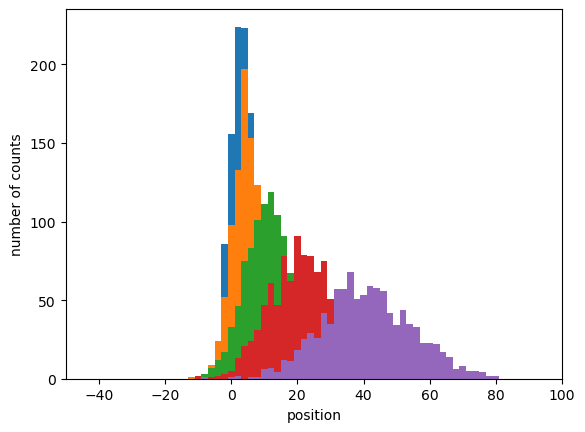

In [6]:
# From all these trajectories, lets calculate mean and variance 
# after every step and plot the distributions.

mean_and_variance = []
for n in [10,20,50,100,200]:
    plt.hist(all_traj[:,n], bins=np.arange(-n_steps, n_steps,2))
    # compute mean and variance for the next analysis.
    mean_and_variance.append([n, np.mean(all_traj[:,n]), np.var(all_traj[:,n])])
plt.xlabel('position')
plt.ylabel('number of counts')
plt.xlim([-50,100])
plt.show()

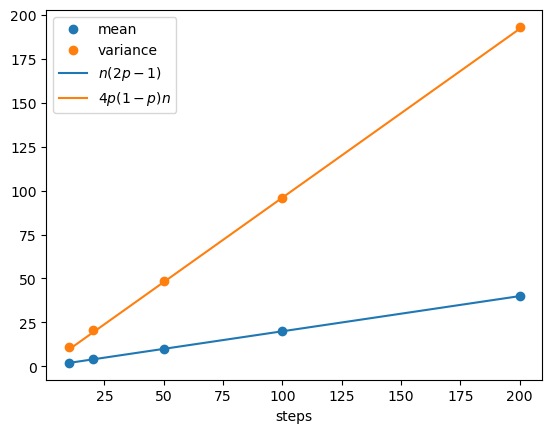

In [7]:
# Instead of distributions, we can also plot mean and variance directly vs the number of steps 
mean_and_variance = np.array(mean_and_variance)
steps, means, variances = mean_and_variance.T

plt.figure()
plt.plot(steps, means, 'o', label='mean', c='C0')
plt.plot(steps, variances, 'o', label='variance', c='C1')
plt.plot(steps, steps*(2*p-1), c='C0', label=r"$n(2p -1)$")
plt.plot(steps, 4*p*(1-p)*steps, c='C1', label=r"$4p(1-p)n$")
plt.xlabel('steps')
plt.legend()
plt.show()

## From random walks to evolving distributions

Above we discussed how random walks are generated by taking random steps to the left or right and showed that the distribution of the position after $n$ steps is given by the binomial distribution $P(x|n)$. Now I want you to consider the distribution $P(x|n)$ as the object that is changing in time:

**Can we express $P(x|n+1)$ in terms of $P(x|n)$?**



To get to site $x$ after $n+1$ steps we need to have been at site:

 * $x-1$ after $n$ steps and jumped right; this happens with probability: $pP(x-1|n)$
 * $x+1$ after $n$ steps and jumped left;  this happens with probability: $(1-p)P(x+1|n)$

From this, we conclude that 

$$
P(x|n+1) = pP(x-1|n) + (1-p)P(x+1|n)
$$

This equation will be starting point for our derivation of the diffusion equation in the next video. 

### Dig Deeper:
 * confirm the expressions for mean and variance of the binomial distribution by explicit computation.
 * confirm that the equation $P(x|n+1) = pP(x-1|n) + (1-p)P(x+1|n)$ is solved by the binomial distribution with $x = 2k - n$.